In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

swipe_data = pd.read_csv('Counts_Avg Meal_Participation.csv')
survey_data = pd.read_csv('HUDS Survey to On-campus Students_November 28, 2020_00.33.csv')

#print(swipe_data.head())
#print(list(survey_data.columns))

question_bank = {'Q2.1': 'Where do you live on campus?',
                 'Q2.2': 'Which class year are you in?',
                 'Q3.1': 'On average, how many servings of the main entree do you take each time you get LUNCH at the dining hall? Note: A serving is one “box” of food.',
                 'Q3.2': 'On average, how many servings of the main entree do you take each time you get DINNER at the dining hall? Note: A serving is one “box” of food.',
                 'Q3.3': 'How many additional containers (from sides, salads, soup, etc.) do you take on average each time you visit the dining hall?',
                 'Q4.2_1': 'Rank in terms of importance - Sustainability',
                 'Q4.2_2': 'Rank in terms of importance - Convenience',
                 'Q4.2_3': 'Rank in terms of importance - Safety',
                 'Q13_1': 'I would be willing to switch to the reusable container system outlined above.',
                 'Q13_2': 'Switching to reusable containers would be environmentally beneficial.',
                 'Q13_3': 'A reusable container program would be difficult for students to maintain and comply with.',
                 'Q13_4': 'I would feel safe about eating from reusable containers that are washed and disinfected by HUDS.'}

clean_dict = {}
for key in question_bank:
    clean_dict[key] = list(survey_data[key])[2: ]

survey_df = pd.DataFrame(data=clean_dict)

lunch_count = clean_dict['Q3.1']
dinner_count = clean_dict['Q3.2']
additional_count = clean_dict['Q3.3']


# clean nan / nulls
lunch_count = [i for i in lunch_count if str(i) != 'nan']
dinner_count = [i for i in dinner_count if str(i) != 'nan']
additional_count = [i for i in additional_count if str(i) != 'nan']

for i, s in enumerate(additional_count):
    if s == '4+':
        additional_count[i] = 4

# cast to int
lunch_count = list(map(int,lunch_count))
dinner_count = list(map(int,dinner_count))
additional_count = list(map(int,additional_count))

# average and standard deviation
avg_lunch = st.mean(lunch_count)
avg_dinner = st.mean(dinner_count)
avg_additional = st.mean(additional_count)

std_lunch = np.std(lunch_count)
std_dinner = np.std(dinner_count)
std_additional = np.std(additional_count)


print("Lunch average amount of containers taken (survey):")
print(avg_lunch)

print("\nDinner average amount of containers taken (survey):")
print(avg_dinner)

print("\nAdditional Containers average amount of containers taken (survey):")
print(avg_additional)

Lunch average amount of containers taken (survey):
1.0818181818181818

Dinner average amount of containers taken (survey):
1.1363636363636365

Additional Containers average amount of containers taken (survey):
1.3727272727272728


In [ ]:

# other notebook
avg_lunch_swipes = 864.2857142857143
avg_dinner_swipes = 898.2857142857143

lunch_containers_per_day = avg_lunch * avg_lunch_swipes
dinner_containers_per_day = avg_lunch * avg_dinner_swipes

print(lunch_containers_per_day)
print(dinner_containers_per_day)

935.0
971.7818181818182


<AxesSubplot:>

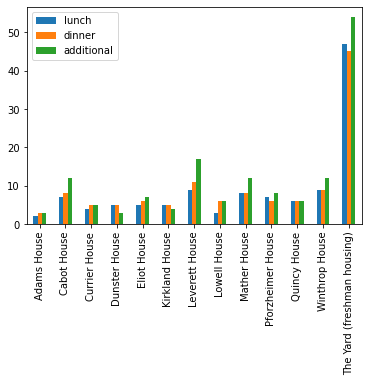

In [ ]:
housing_options = ['Adams House', 'Cabot House', 'Currier House', 'Dunster House', 'Eliot House', 'Kirkland House', 'Leverett House', 'Lowell House', 'Mather House', 'Pforzheimer House', 'Quincy House', 'Winthrop House', 'The Yard (freshman housing)']

lunch = {}
dinner = {}
additional = {}

lunch_tot = {}
dinner_tot = {}
additional_tot = {}

for house in housing_options:
    lunch[house] = 0
    dinner[house] = 0
    additional[house] = 0

    lunch_tot[house] = 0
    dinner_tot[house] = 0
    additional_tot[house] = 0

for i in range(1, len(survey_df)):
    for house in housing_options:
        if survey_df.iloc[i, 0] == house:
            if not str(survey_df.iloc[i, 2]) == 'nan':
                lunch[house] += int(survey_df.iloc[i, 2])
                lunch_tot[house] += 1
            if not str(survey_df.iloc[i, 3]) == 'nan':
                dinner[house] += int(survey_df.iloc[i, 3])
                dinner_tot[house] += 1
            if not str(survey_df.iloc[i, 4]) == 'nan':
                additional_tot[house] += 1
                if str(survey_df.iloc[i, 4]) == '4+':
                    additional[house] += 4
                else:
                    additional[house] += int(survey_df.iloc[i, 4])

df = pd.DataFrame({'lunch': lunch, 'dinner': dinner, 'additional': additional}, index = housing_options)
df.plot.bar()

4     24
8     26
12    24
16    28
20    26
24    27
28    26
32    20
36    39
40    23
44    29
Name: Adams, dtype: object


<AxesSubplot:>

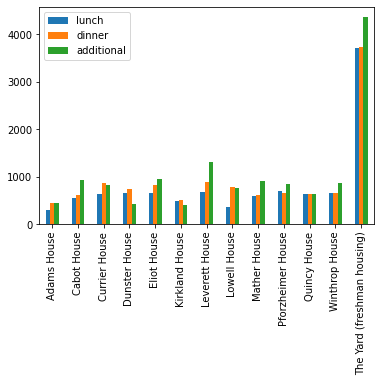

In [ ]:
valid_columns = []
for column in list(swipe_data.columns):
        if "Unnamed" not in column:
            valid_columns.append(column)

columns = swipe_data[valid_columns]

lunch_swipes = columns.iloc[range(4, 47, 4)] 
dinner_swipes = columns.iloc[range(5, 47, 4)] 

print(lunch_swipes['Adams'])

lunch_swipe_totals = {}
dinner_swipe_totals = {}

for col in valid_columns:
    lunch_swipe_totals[col] = 0
    dinner_swipe_totals[col] = 0

for col in valid_columns:
    for i in range(len(lunch_swipes)):
        lunch_swipe_totals[col] += int(lunch_swipes[col].iloc[i])
        dinner_swipe_totals[col] += int(dinner_swipes[col].iloc[i])

lunch_avg = {}
dinner_avg = {}
additional_avg = {}

for house in housing_options:
    lunch_avg[house] = lunch[house]/lunch_tot[house]
    dinner_avg[house] = dinner[house]/dinner_tot[house]
    additional_avg[house] = additional[house]/additional_tot[house]

lunch_final = {}
dinner_final = {}
additional_final = {}

for col in valid_columns:
    if col == 'Annenberg':
        house = 'The Yard (freshman housing)'
    else:
        house = col + " House"
    lunch_final[house] = lunch_swipe_totals[col] * lunch_avg[house]
    dinner_final[house] = dinner_swipe_totals[col] * dinner_avg[house]
    additional_final[house] = 0.5 * lunch_swipe_totals[col] * additional_avg[house] + 0.5 * dinner_swipe_totals[col] * additional_avg[house]

df = pd.DataFrame({'lunch': lunch_final, 'dinner': dinner_final, 'additional': additional_final}, index = housing_options)
df.plot.bar()

In [ ]:
import plotly.express as px

df = pd.DataFrame({'lunch': lunch_final, 'dinner': dinner_final, 'additional': additional_final}, index = housing_options)
b_chart = px.bar(df, barmode = 'group', labels = {'value':'Number of Containers', 'index': 'Dining Hall', 'variable': ''}, 
# 570101
# barmode = 'stack'
# how to you get rid of the white borders between bars
color_discrete_sequence=['#FF9586', '#eb4e42', '#b0171f'], title = "Container consumption per dining hall per meal")

b_chart.update_traces(marker_line_width=0)
b_chart.show()

In [ ]:
pip install plotly.express


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


2    40
3    35
1    18
Name: Sustainability, dtype: int64
[18, 40, 35]
1    46
2    31
3    16
Name: Safety, dtype: int64
[16, 46, 31]
3    42
1    29
2    22
Name: Convenience, dtype: int64
[29, 22, 42]
    0   1   2
0  18  40  35
1  16  46  31
2  29  22  42


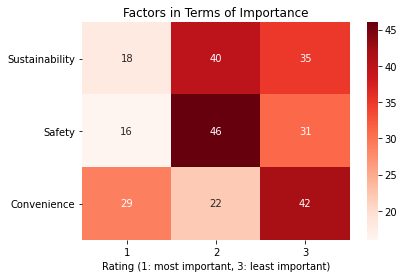

In [ ]:
import seaborn as sns
import plotly.express as px

survey_dataframe = pd.DataFrame(survey_data)

importance_ratings = survey_dataframe.iloc[3:, range(22, 25)]
importance_ratings.columns = ['Sustainability', 'Convenience', 'Safety']

importance_ratings_cleaned = pd.DataFrame.dropna(importance_ratings, axis=0, how="any")
# print(importance_ratings_cleaned)

a = importance_ratings_cleaned['Sustainability'].value_counts()
print(a)
# hard coding it bc idk how not to
a1 = list(a)[2]
a2 = list(a)[0]
a3 = list(a)[1]
print([a1, a2, a3])
b = importance_ratings_cleaned['Safety'].value_counts()
print(b)
b1 = list(b)[2]
b2 = list(b)[0]
b3 = list(b)[1]
print([b1, b2, b3])
c = importance_ratings_cleaned['Convenience'].value_counts()
print(c)
c1 = list(c)[1]
c2 = list(c)[2]
c3 = list(c)[0]
print([c1, c2, c3])
heatmap_array = [[a1, a2, a3], [b1, b2, b3], [c1, c2, c3]]
heatmap_data = pd.DataFrame(heatmap_array)

print(heatmap_data)
heatmap_data.index = ['Sustainability', 'Safety', 'Convenience']
heatmap_data.columns = [1, 2, 3]

heatmap = sns.heatmap(heatmap_data, cmap="Reds", annot=True)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=360)
plt.xlabel("Rating (1: most important, 3: least important)")
plt.title("Factors in Terms of Importance")
plt.show()


fig = px.imshow(heatmap_data, x=['Most important', 'Somewhat important', 'Less important'], color_continuous_scale="Reds",title="Factors in Terms of Importance")
# , labels=dict(x="Rating", y="Factor", color="Frequency")
fig.update_xaxes(tickfont=dict(size=11))
fig.show()

                     Question 1      Question 2                  Question 3  \
3                Somewhat agree  Strongly agree              Somewhat agree   
4    Neither agree nor disagree  Strongly agree              Somewhat agree   
5             Strongly Disagree           Agree                       Agree   
6                Strongly agree  Strongly agree  Neither agree nor disagree   
7             Strongly Disagree  Somewhat agree                       Agree   
..                          ...             ...                         ...   
99            Somewhat disagree  Somewhat agree                       Agree   
100              Somewhat agree  Strongly agree                       Agree   
101              Strongly agree  Strongly agree              Somewhat agree   
102              Strongly agree  Strongly agree                    Disagree   
103           Somewhat disagree  Somewhat agree                       Agree   

            Question 4  
3       Strongly agree  
4

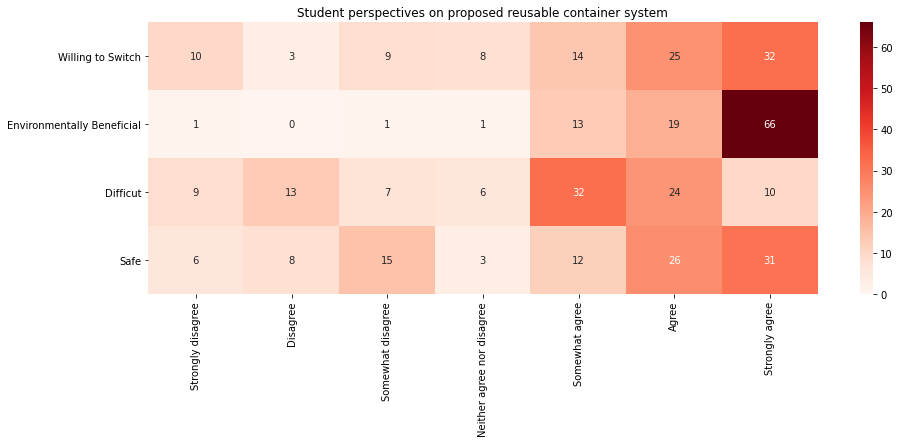

In [ ]:


agreement = survey_dataframe.iloc[3:, 25:]
agreement.columns = ['Question 1', 'Question 2', 'Question 3', 'Question 4']

agreement_cleaned = pd.DataFrame.dropna(agreement, axis=0, how="any")
print(agreement_cleaned)

q1 = agreement_cleaned['Question 1'].value_counts()
print(q1)
q11 = q1['Strongly Disagree']
q12 = q1['Disagree']
q13 = q1['Somewhat disagree']
q14 = q1['Neither agree nor disagree']
q15 = q1['Somewhat agree']
q16 = q1['Agree']
q17 = q1['Strongly agree']
q1_agreement = [q11, q12, q13, q14, q15, q16, q17]

q2 = agreement_cleaned['Question 2'].value_counts()
print(q2)
q21 = q2['Strongly Disagree']
q22 = 0 #hard coded lol
q23 = q2['Somewhat disagree']
q24 = q2['Neither agree nor disagree']
q25 = q2['Somewhat agree']
q26 = q2['Agree']
q27 = q2['Strongly agree']
q2_agreement = [q21, q22, q23, q24, q25, q26, q27]

q3 = agreement_cleaned['Question 3'].value_counts()
q31 = q3['Strongly Disagree']
q32 = q3['Disagree']
q33 = q3['Somewhat disagree']
q34 = q3['Neither agree nor disagree']
q35 = q3['Somewhat agree']
q36 = q3['Agree']
q37 = q3['Strongly agree']
q3_agreement = [q31, q32, q33, q34, q35, q36, q37]
print(q3)

q4 = agreement_cleaned['Question 4'].value_counts()
q41 = q4['Strongly Disagree']
q42 = q4['Disagree']
q43 = q4['Somewhat disagree']
q44 = q4['Neither agree nor disagree']
q45 = q4['Somewhat agree']
q46 = q4['Agree']
q47 = q4['Strongly agree']
q4_agreement = [q41, q42, q43, q44, q45, q46, q47]
print(q4)

agreement_data = pd.DataFrame([q1_agreement, q2_agreement, q3_agreement, q4_agreement])
# agreement_data = agreement_data.T
# Corresponding to Questions 1-4
agreement_data.index = ['Willing to Switch', 'Environmentally Beneficial', 'Difficut', 'Safe'] # FIX LATER
agreement_data.columns = ['Strongly disagree', 'Disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
print(agreement_data)


plt.figure(figsize = (15,5))
agreement_heatmap = sns.heatmap(agreement_data, cmap="Reds", annot=True)
agreement_heatmap.set_yticklabels(agreement_heatmap.get_yticklabels(), rotation=360)
plt.title("Student perspectives on proposed reusable container system")
plt.show()

fig = px.imshow(agreement_data, color_continuous_scale="mint", labels=dict(color="Frequency"), title="Student perspectives on proposed reusable container system")
# , labels=dict(x="Rating", y="Factor", color="Frequency")
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
)
fig.update_xaxes(tickangle=90, tickfont=dict(size=12))
fig.show()



    0   1   2  3   4   5   6
0  10   3   9  8  14  25  32
1   9  13   7  6  32  24  10
2   6   8  15  3  12  26  31


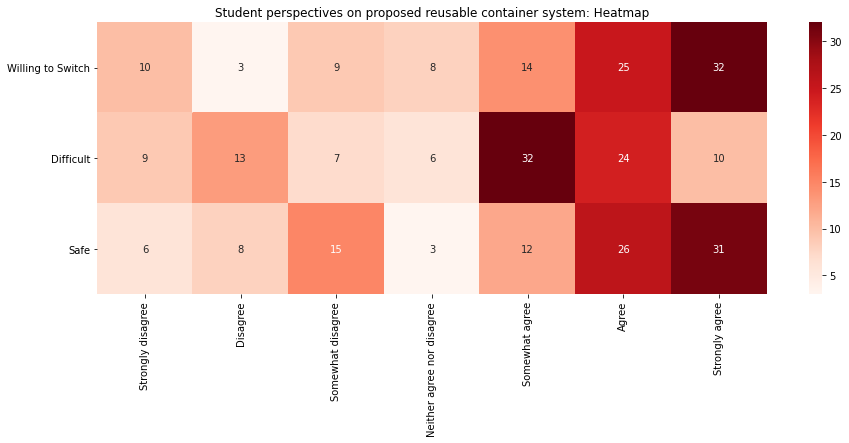

In [ ]:
import plotly.express as px

# the environmentally beneficial question was taken out bc there's too much agreement 
agreement_data2 = pd.DataFrame([q1_agreement, q3_agreement, q4_agreement])
print(agreement_data2)
# Corresponding to Questions 1, 3, 4
agreement_data2.index = ['Willing to Switch', 'Difficult', 'Safe'] # FIX LATER
lst = ['Strongly disagree', 'Disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
agreement_data2.columns = lst


plt.figure(figsize = (15,5))
agreement_heatmap2 = sns.heatmap(agreement_data2, cmap="Reds", annot=True)
agreement_heatmap2.set_yticklabels(agreement_heatmap2.get_yticklabels(), rotation=360)
plt.title("Student perspectives on proposed reusable container system: Heatmap")
plt.show()

fig2 = px.imshow(agreement_data2, color_continuous_scale="reds", labels=dict(color="Frequency"), title="Student perspectives on proposed reusable container system")
# , labels=dict(x="Rating", y="Factor", color="Frequency")
fig2.update_layout(
    autosize=False,
    width=900,
    height=600,
)

# 570101
# 760000
# BE1E26
# D84742
# f25246
# FF6B61
# FF9586

fig2.update_xaxes(tickangle=270, tickfont=dict(size=12))
fig2.show()

q1_bar = q1_agreement.copy()
q1_bar.reverse()
q3_bar = q3_agreement.copy()
q3_bar.reverse()
q4_bar = q4_agreement.copy()
q4_bar.reverse()
lst_bar = lst.copy()
lst_bar.reverse()
bar_data = pd.DataFrame([q1_bar, q3_bar, q4_bar])
bar_data.index = ['Willing to Switch', 'Difficult', 'Safe']
bar_data.columns = lst_bar
bar_chart = px.bar(bar_data, barmode = 'stack', labels = {'value':'Frequency', 'index': '', 'variable': ''}, 
# 570101
# how to you get rid of the white borders between bars
color_discrete_sequence=['#760000', '#b0171f', '#d23a35', '#eb4e42', '#ff7066', '#FF9586', '#ffafa3'], title="Student perspectives on proposed reusable container system: Segmented Bar Chart")

bar_chart.update_traces(marker_line_width=0)
bar_chart.show()